In [1]:
#Importing the libraries
import nltk
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth",200)
%matplotlib inline

C:\Users\Akshay\Anaconda4\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
#Importing the training and test sets
train=pd.read_csv('C:/Users/Akshay/Desktop/Machine_Learning_AZ/Machine Learning A-Z Template Folder/Twitter_Sentiment_Analysis/train_E6oV3lV.csv')
test=pd.read_csv('C:/Users/Akshay/Desktop/Machine_Learning_AZ/Machine Learning A-Z Template Folder/Twitter_Sentiment_Analysis/test_tweets_anuFYb8.csv')

Text is an unstructured form of data, and a lot of noise are present in it, and it is not readily analyzable without preprocessing. The entire process of cleaning and standardization of text, in order to make it ready for analysis is called as text preprocessing.
I am going to divide this process into two parts:
1)Data Inspection
2)Data Cleaning

Here, in our dataset we must understand that, if the label denotes 1, then the tweet is a racist/sexist tweet. If the label denotes 0, the tweet is a non racist/sexist tweet.

In [3]:
#Data Inspection
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [4]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


Here,in the above code, we had a look at few of the racist/sexist and non racist/sexist tweets. We can observe that, our dataset contains many unwanted words and characters. So we will try to keep the words which are most important and adds meaning.

Let us now have a look at the dimensions of our dataset.

In [5]:
#Checking the dimensions of our training set
train.shape

(31962, 3)

In [6]:
#Checking the dimensions of our test set
test.shape

(17197, 2)

We can see that, our train set has 31962 tweets and the test set has 17197 tweets.

Now, let us have a look at the label-distribution in our train dataset

In [7]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

So, we can see that our train set has 29720 non racist/sexist tweets and 2242 racist/sexist tweets. So,we can clearly say that this is an imbalanced classification problem.

Now, as we have seen that we have an imbalanced dataset, the next step in natural language processing would be to clean the raw text data. This step will help us in removing unwanted words and characters which helps us in obtaining better features. If we skip this step, there can be a possibility that, we are working with a noisy data set.

The main objective of this step is to remove noise from the data set that are least relevant to predict the sentiment of tweets such as Punctuations, special characters, numbers and other terms.

Before cleaning our data, we must first combine our training set and test set. By combining, the preprocessing stage would become more easier to perform.

In [8]:
#Combining the training set and test set into a single data set
combined=train.append(test,ignore_index=True)
combined.shape

(49159, 3)

In [9]:
#User defined function
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,' ',input_txt)
    return input_txt

The above user defined function can be used to remove the unwanted patterns in our dataset. The findall() function finds all the matches and returns them as strings, and each string represents one match.

Now, we will try to remove Twitter Handles, punctuations, numbers, special characters, shortwords from our dataset one by one.

In [10]:
#Removing Twitter Handles(@User)
combined['tidy_tweet']=np.vectorize(remove_pattern)(combined['tweet'],"@[\w]*")
combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
#Removing the punctuations,numbers and special characters and replacing each of it with spaces
combined['tidy_tweet']=combined['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combined.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


Now, while removing shortwords, we have to be a little careful while selecting the length of the words which we want to remove. We will be removing the words having the length of 3 or less.

In [12]:
#Removing the shortwords
combined['tidy_tweet']=combined['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In the above output, we have created a separate column tidy_tweet, where we indicate the output for the cleaned data, that is, after removing the twitter handles, punctuations, special characters(except hastags) and short words.
Now, we will tokenize the tweets and later we will lemmatize it.

In [13]:
#Tokenizing the tweets
tokenized_tweet=combined['tidy_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [14]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
tokenized_tweet=tokenized_tweet.apply(lambda x:[lemmatizer.lemmatize(i) for i in x])

Now we will join these tokens back together.

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])
combined['tidy_tweet']=tokenized_tweet

Now, after we have cleaned the tweets, we will now explore the cleaned tweets. By exploring and visualizing data, no matter whether it is text or any other data, it is an essential step in gathering insights. Before we begin the exploration stage, we must think and ask the questions about the data in hand. The probable questions would be:
1)What are the most common words in our entire dataset?
2)what are the most common words in our dataset for positive and negative tweets respectively?
3)How many hastags are there in a tweet?
4)Which trends are associated with our dataset?
5)Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

In [16]:
#Understanding the most common words used in the tweets

Now we will see how well the given sentiments are distributed across the train dataset. We will accomplish this task by using the collections counter. The collections module implements high performance container data types and contains useful data structures that can be used to store information in the memory.
The Counter is a container that tracks how many times equivalent values are added.
The code below tokenizes each tweet in the tidy_tweet column and counts the most commonly occuring words in our dataset.

In [17]:
all_words = []
for x in list(combined['tidy_tweet']):
    words = x.split()
    for word in words:
        all_words.append(word.lower())

In [18]:
from collections import Counter
Counter(all_words).most_common()

[('this', 4126),
 ('with', 3864),
 ('that', 3192),
 ('your', 2637),
 ('have', 2483),
 ('happy', 2450),
 ('#love', 2366),
 ('just', 2099),
 ('love', 1968),
 ('will', 1950),
 ('when', 1892),
 ('time', 1875),
 ('what', 1836),
 ('from', 1642),
 ('today', 1581),
 ('like', 1551),
 ('about', 1333),
 ('#positive', 1331),
 ('they', 1325),
 ('make', 1313),
 ('people', 1257),
 ('life', 1249),
 ('good', 1222),
 ('more', 1134),
 ('father', 1134),
 ('want', 1090),
 ('take', 1015),
 ('bihday', 916),
 ('need', 912),
 ('#healthy', 900),
 ('there', 877),
 ('week', 875),
 ('year', 840),
 ('#smile', 826),
 ('here', 784),
 ('bull', 777),
 ('only', 774),
 ('day', 761),
 ('#thankful', 754),
 ('great', 753),
 ('going', 745),
 ('work', 743),
 ('know', 739),
 ('first', 733),
 ('best', 724),
 ('their', 716),
 ('really', 712),
 ('thing', 702),
 ('wait', 693),
 ('thankful', 682),
 ('#fun', 677),
 ('back', 676),
 ('been', 670),
 ('feel', 669),
 ('tomorrow', 660),
 ('#life', 648),
 ('some', 645),
 ('very', 643),
 ('

We can see that most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. But it does not give us any idea about the words associated with the racist or sexist tweets. Hence, I am going to create a separate Counter container for racist or sexist tweets and non racist or sexist tweets.

In [19]:
#Word Frequency in non-racist/sexist tweets
positive_words=[]
for x in list(combined['tidy_tweet'][combined['label']==0]):
    words=x.split()
    for word in words:
        positive_words.append(word.lower())

In [20]:
Counter(positive_words).most_common()

[('this', 2483),
 ('with', 2403),
 ('that', 1858),
 ('your', 1603),
 ('happy', 1576),
 ('have', 1535),
 ('#love', 1530),
 ('just', 1282),
 ('love', 1246),
 ('when', 1203),
 ('will', 1199),
 ('time', 1180),
 ('what', 1067),
 ('today', 1013),
 ('from', 977),
 ('like', 923),
 ('#positive', 878),
 ('life', 818),
 ('make', 789),
 ('good', 767),
 ('about', 762),
 ('people', 745),
 ('father', 737),
 ('they', 729),
 ('want', 676),
 ('more', 669),
 ('take', 651),
 ('bihday', 584),
 ('week', 583),
 ('#healthy', 572),
 ('need', 564),
 ('#smile', 557),
 ('there', 533),
 ('bull', 506),
 ('year', 498),
 ('#thankful', 495),
 ('day', 494),
 ('here', 482),
 ('work', 479),
 ('going', 475),
 ('best', 469),
 ('great', 464),
 ('first', 459),
 ('wait', 459),
 ('thankful', 456),
 ('thing', 454),
 ('only', 446),
 ('really', 444),
 ('#fun', 444),
 ('know', 443),
 ('tomorrow', 441),
 ('their', 437),
 ('back', 425),
 ('#life', 417),
 ('some', 414),
 ('come', 411),
 ('very', 407),
 ('friend', 400),
 ('been', 398)

Most of the words are compatible with the sentiment that is, non-racist/sexist. Now, similarly we will check the most frequently occuring racist or sexist words.

In [21]:
negative_words=[]
for x in list(combined['tidy_tweet'][combined['label']==1]):
    words=x.split()
    for word in words:
        negative_words.append(word.lower())

In [22]:
Counter(negative_words).most_common()

[('that', 204),
 ('this', 196),
 ('white', 140),
 ('like', 140),
 ('#trump', 136),
 ('with', 116),
 ('racist', 113),
 ('woman', 109),
 ('about', 106),
 ('have', 105),
 ('they', 104),
 ('black', 103),
 ('what', 101),
 ('#politics', 95),
 ('#allahsoil', 92),
 ('your', 88),
 ('people', 84),
 ('trump', 81),
 ('just', 79),
 ('might', 77),
 ('from', 77),
 ('#libtard', 76),
 ('#liberal', 75),
 ('#sjw', 74),
 ('will', 74),
 ('libtard', 73),
 ('because', 68),
 ('racism', 66),
 ('against', 64),
 ('#retweet', 63),
 ('feel', 60),
 ('listen', 57),
 ('right', 56),
 ('word', 53),
 ('when', 53),
 ('more', 50),
 ('girl', 49),
 ('comment', 49),
 ('video', 48),
 ('stomping', 48),
 ('over', 47),
 ('obama', 46),
 ('#miami', 46),
 ('should', 45),
 ('being', 45),
 ('only', 44),
 ('year', 44),
 ('#black', 44),
 ('call', 43),
 ('hate', 42),
 ('would', 40),
 ('think', 39),
 ('make', 39),
 ('need', 39),
 ('been', 37),
 ('stop', 37),
 ('there', 36),
 ('race', 35),
 ('want', 35),
 ('their', 34),
 ('america', 34),


As we can see clearly, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will look at the hashtags/ trends in our twitter data.

In [23]:
#Understanding the impact of Hashtags on tweet sentiment

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. Next, we will try and check if the hashtags add any value to our sentiment analysis task, that is, they help in distinguishing tweets into different sentiments.

In [24]:
#Function to collect hashtags
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [25]:
#Extracting hashtags from non-racist/sexist tweets
ht_positive=hashtag_extract(combined['tidy_tweet'][combined['label']==0])

In [26]:
#Extracting hashtags from racist/sexist
ht_negative=hashtag_extract(combined['tidy_tweet'][combined['label']==1])

In [27]:
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [28]:
ht_positive,ht_negative

(['run',
  'lyft',
  'disapointed',
  'getthanked',
  'model',
  'motivation',
  'allshowandnogo',
  'school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl',
  'allin',
  'cavs',
  'champions',
  'cleveland',
  'clevelandcavaliers',
  'ireland',
  'blog',
  'silver',
  'gold',
  'forex',
  'orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love',
  'gettingfed',
  'got',
  'junior',
  'yugyoem',
  'omg',
  'thankful',
  'positive',
  'friday',
  'cookies',
  'euro',
  'badday',
  'coneofshame',
  'cats',
  'pissed',
  'funny',
  'laughs',
  'wine',
  'weekend',
  'tgif',
  'gamedev',
  'indiedev',
  'indiegamedev',
  'squad',
  'upsideofflorida',
  'shopalyssas',
  'love',
  'smiles',
  'media',
  'pressconference',
  'antalya',
  'turkey',
  'throwback',
  'ica',
  'rip',
  'orlando',
  'alohafriday',
  'time',
  'not',
  'exist',
  'positivevibes',
  'hawaiian',
 

Now, in the above code sections, we have extracted the positive and negative hastags and we have unnested them separately into positive and negative hashtags. 

Now that we have prepared our list of hashtags for both the sentiments, we will plot the top 'n' hashtags. We will do it separately for positive hashtags and negative hashtags.

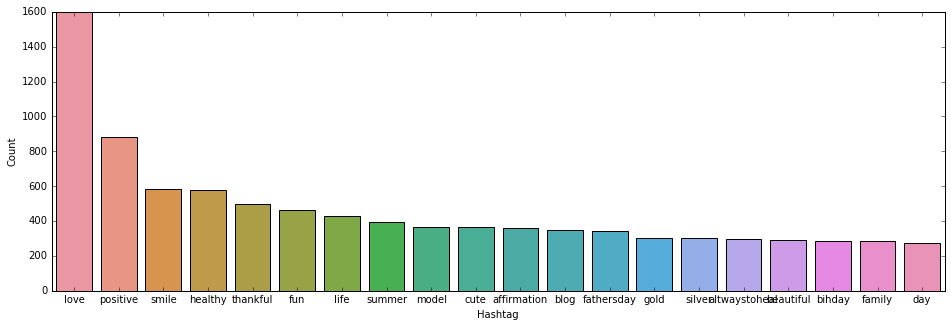

In [29]:
#Non-Racist or sexist(Positive) tweets
a=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
#Selecting the top 20 most frequent hashtags
d=d.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()

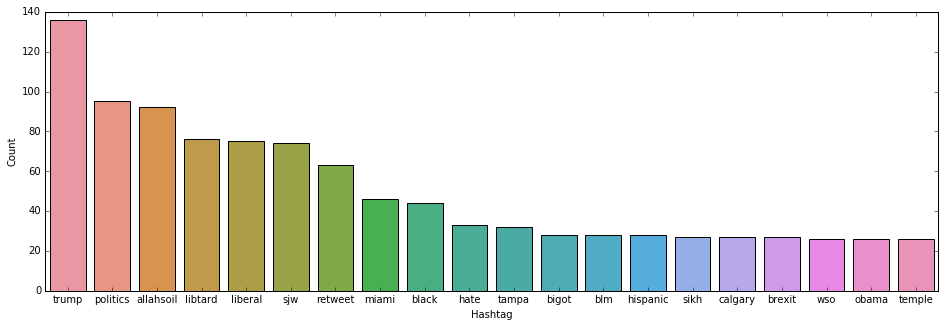

In [30]:
#Racist/Sexist(Negative) tweets
b=nltk.FreqDist(ht_negative)
e=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
#Selecting the top 20 most frequent hashtags
e=e.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e,x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()

Next, we will try to extract features from the tokenized tweets. We need to extract features from tokenized tweets because, we must analyze the preprocessed data. We will use Bag of words technique for this.

In [31]:
#Creating the Bag Of Words model
from sklearn.feature_extraction.text import CountVectorizer
bow_vec=CountVectorizer(max_features=1500)
bow=bow_vec.fit_transform(combined['tidy_tweet'])
bow.shape

(49159, 1500)

In [32]:
#Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec=TfidfVectorizer(max_features=1500)
tfidf=tfidf_vec.fit_transform(combined['tidy_tweet'])
tfidf.shape

(49159, 1500)

In [33]:
#Creating the word2vec model
from gensim.models import Word2Vec
tokenized_tweet=combined['tidy_tweet'].apply(lambda x:x.split())
w2v_mod=Word2Vec(tokenized_tweet,min_count=2)

In [34]:
#Training the word2vec model
w2v_mod.train(tokenized_tweet,total_examples=len(combined['tidy_tweet']),epochs=20)

(6482900, 7536020)

In [35]:
w2v_mod.wv.most_similar(positive="dinner")

[('lunch', 0.8059802055358887),
 ('breakfast', 0.7956880331039429),
 ('wine', 0.7450698018074036),
 ('feast', 0.7443965673446655),
 ('#toast', 0.7377075552940369),
 ('bestie', 0.7193197011947632),
 ('hanging', 0.711086630821228),
 ('garden', 0.7075337171554565),
 ('brunch', 0.7035032510757446),
 ('pool', 0.6980099081993103)]

In [36]:
w2v_mod.wv.most_similar(positive="trump")

[('donald', 0.8429051637649536),
 ('campaign', 0.8201583027839661),
 ('obama', 0.8169601559638977),
 ('hillary', 0.8142253160476685),
 ('unstable', 0.7917405962944031),
 ('putin', 0.7903689742088318),
 ('bernie', 0.7575123310089111),
 ('voting', 0.7569600343704224),
 ('vote', 0.7556860446929932),
 ('racist', 0.7528178691864014)]

In the code sections above, we are importing the Word2Vec model from the gensim library. Then, we are tokenizing our tweets. We are doing tokenization again as this is the first step in building our word2vec model.

Then we are creating an object w2v_mod for Word2Vec. Then, we are training our model on our corpus. 

After that, we are trying to figure out whether the model can pull out most similar words from our corpus. We can see that, our model does a very good job.

Now, we will check the vector representation of any word from our corpus.

In [37]:
w2v_mod['dinner']

C:\Users\Akshay\Anaconda4\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


array([ 0.98685414, -0.36812201,  0.06379024,  0.01455349, -0.10499932,
       -0.77425325, -0.36636218,  0.39346734,  0.95954335, -0.29622954,
        0.34278196,  0.71590441,  0.4047839 , -1.30330098, -0.64049166,
        0.85332876, -0.51551998,  0.6437797 ,  1.43574655,  0.19706316,
       -0.65186691,  0.2544499 ,  0.12880599, -0.37395489,  0.23246238,
       -0.64873827,  0.6591351 ,  0.72476715,  0.839136  ,  0.02462676,
       -0.06397107,  0.79839325, -0.49683955,  0.58804667,  0.17115943,
       -0.15648286, -0.69763434, -1.02887511,  0.47052482, -0.94125354,
        0.00261001, -0.1912571 , -0.52102834, -0.75780737,  0.22004798,
       -0.15131892, -0.25006551, -0.85358477, -0.01595001, -0.44324058,
        0.73321414,  0.39771664,  0.53636605,  0.79979199, -0.27595919,
       -0.08787019,  0.73576093, -0.15772749,  0.49010739, -0.01999306,
       -1.09173524,  0.3614822 , -0.45357576, -0.32222646,  0.28391084,
       -1.20699871,  0.38492119,  0.08248769, -0.35084715, -0.09

In [38]:
len(w2v_mod['food'])

C:\Users\Akshay\Anaconda4\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


100

From above we see that the length of the word food is 100.

# Preparing vectors for tweets

Since our data contains tweets and not just words, we must figure out a way to use the word vectors from the word2vec model to create vector representation for entire tweet. The solution to this problem is that, we can take the mean of all the words present in the tweet. The length of the resultant vector will be 100. We will repeat the same for all the tweets in our data and obtain their vectors. Now we have 100 word2vec features for our data.

In [39]:
#Function to create a vector for each tweet by taking the average of the vector of words present in the tweet
def word_vector(tokens,size):
    vec=np.zeros(size).reshape((1,size))
    count=0
    for word in tokens:
        try:
            vec=vec+w2v_mod[word].reshape((1,size))
            count=count+1
        except KeyError:# Handling the case when the token is not in the vocabulary
                        continue
    if count!=0:
        vec=vec/count
    return vec

In [40]:
#Preparing the word2vec feature set
word2vec_arrays=np.zeros((len(tokenized_tweet),100))
for i in range(len(tokenized_tweet)):
    word2vec_arrays[i,:]=word_vector(tokenized_tweet[i],100)
    word2vec_df=pd.DataFrame(word2vec_arrays)


C:\Users\Akshay\Anaconda4\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [41]:
word2vec_df.shape

(49159, 100)

Now we have 100 new features, whereas in Bag of Words and TF-IDF we had 1500 features.

Now we are done with pre-modeling stages required to get the data in the proper form and shape. We will be building the models on the datasets built with different feature sets prepared earlier like Bag of Words, TF-IDF, Word2Vec vectors. We will use the following models:

1)Logistic Regression
2)Support Vector Machine
3)Decision Tree Classifier
4)Random Forest Classifier
6)XGBoost

## 1)Logistic Regression with each of Bag of Words, TF-IDF and Word2Vec

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
#1.Logistic regression using Bag of words
#Extracting the training and test Bag of Words Features
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]

In [44]:
train_bow.shape

(31962, 1500)

In [45]:
test_bow.shape

(17197, 1500)

In [46]:
xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],test_size=0.20,random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
cllogreg=LogisticRegression(random_state=0)
#Fitting the logistic regression to the training set
cllogreg.fit(xtrain_bow,ytrain)
#Predicting on the validation set
prediction=cllogreg.predict_proba(xvalid_bow)
prediction_int=prediction[:,1]>=0.5
prediction_int=prediction_int.astype(np.int)
#Computing the f1 score
f1_score(yvalid,prediction_int)

C:\Users\Akshay\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.55590062111801242

In [47]:
#Predicting the result for test set and making the submission file
test_pred=cllogreg.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.5
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('LogReg.csv',index=False)

The f1 score that we get is 0.5559

In [48]:
#2.Logistic Regression using TF-IDF
#Extracting the train and test features from TF-IDF
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[:-31962,:]

In [49]:
train_tfidf.shape

(31962, 1500)

In [50]:
test_tfidf.shape

(17197, 1500)

In [51]:
xtrain_tfidf,xvalid_tfidf,ytrain,yvalid=train_test_split(train_tfidf,train['label'],random_state=0,test_size=0.20)
#Fitting the logistic regression to the training set
cllogreg.fit(xtrain_tfidf,ytrain)
#Predicting on the validation set
prediction=cllogreg.predict_proba(xvalid_tfidf)
prediction_int=prediction[:,1]>=0.5
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

C:\Users\Akshay\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.50000000000000011

In [52]:
#Predicting the test set result and making the submission file
test_pred=cllogreg.predict_proba(test_tfidf)
test_pred_int=test_pred[:,1]>=0.5
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('LogReg_tfidf.csv',index=False)

Here we got an f1 score of 0.500

In [53]:
#3.Logistic Regression using word2vec
#Extracting train and test features from word2vec
train_w2v=word2vec_df.iloc[:31962,:]
test_w2v=word2vec_df.iloc[:-31962,:]

In [54]:
train_w2v.shape

(31962, 100)

In [55]:
test_w2v.shape

(17197, 100)

In [56]:
xtrain_w2v,xvalid_w2v,ytrain,yvalid=train_test_split(train_w2v,train['label'],random_state=0,test_size=0.20)
#Fitting the logistic regression to the training set
cllogreg.fit(xtrain_w2v,ytrain)
#Predicting on the validation set
prediction=cllogreg.predict_proba(xvalid_w2v)
prediction_int=prediction[:,1]>=0.5
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

C:\Users\Akshay\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.47058823529411764

In [57]:
#Making the prediction on the test set and creating the submission file
test_pred=cllogreg.predict_proba(test_w2v)
test_pred_int=test_pred[:,1]>=0.5
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('LogReg_word2vec.csv',index=False)

## 2. Support Vector Machine with Bag of Words, TF-IDF and Word2vec

In [58]:
#SVM
#1.SVM with Bag of words
from sklearn.svm import SVC
svmclass=SVC(kernel='linear',random_state=0)
svmclass.fit(xtrain_bow,ytrain)
#Predicting on the validation set
prediction=svmclass.predict(xvalid_bow)
f1_score(yvalid,prediction)

0.5736434108527132

Here, we get an f1 score of 0.5736

In [59]:
#Predicting the test set results and making the submission file
test_pred=svmclass.predict(test_bow)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('svm_bow.csv',index=False)

In [60]:
#2.SVM with TF-IDF
#Fitting SVM into the training set
svmclass.fit(xtrain_tfidf,ytrain)
#Predicting the validation set
prediction=svmclass.predict(xvalid_tfidf)
f1_score(yvalid,prediction)

0.53820598006644516

Here we get an F1-Score of 0.5382

In [61]:
#Predicting the test set results and making the submission file
test_pred=svmclass.predict(test_tfidf)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('svm_tfidf.csv',index=False)

In [62]:
#3.SVM with Word2Vec
svmclass.fit(xtrain_w2v,ytrain)
#Predicting the validation set
prediction=svmclass.predict(xvalid_w2v)
f1_score(yvalid,prediction)

0.41144901610017887

Here we got an f1 score of 0.4114 which means that our Word2Vec features do not seem to be capturing the right signals.

In [63]:
#Predicting the test set results and making the submission files
test_pred=svmclass.predict(test_w2v)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('svm_w2v.csv',index=False)

## 3. Random Forest with Bag of Words, TF-IDF and Word2Vec

In [64]:
#Random forest classifier
#1.Random Forest with Bag of words
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=0)
#Fitting the RandomForest Classifier to the training set
rfc.fit(xtrain_bow,ytrain)
#Predicting the validation set result
prediction=rfc.predict(xvalid_bow)
f1_score(yvalid,prediction)

0.60212201591511927

Here we get an f1 score of 0.6021

In [65]:
#Predicting the test set results and making the submission file
test_pred=rfc.predict(test_bow)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('RandomForest_bow.csv',index=False)

In [66]:
#2.Random Forest with TF-IDF
#Fitting the random forest classifier to the training set
rfc.fit(xtrain_tfidf,ytrain)
#Predicting the validation set result
prediction=rfc.predict(xvalid_tfidf)
f1_score(yvalid,prediction)

0.63283582089552237

Here we get an f1 score of 0.6328

In [67]:
#Predicting the test set results and making the submission file
test_pred=rfc.predict(test_tfidf)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('RandomForest_tfidf.csv',index=False)

In [68]:
#3.Random Forest with Word2Vec
#Random forest classifier to the training set
rfc.fit(xtrain_w2v,ytrain)
#Predicting the validation set result
prediction=rfc.predict(xvalid_w2v)
f1_score(yvalid,prediction)

0.56666666666666665

Here we got an f1 score of 0.56666

In [69]:
#Predicting the test set results and making the submission file
test_pred=rfc.predict(test_w2v)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('RandomForest_w2v.csv',index=False)

## XGboost classifier with Bag of Words, TF-IDF and Word2Vec

In [70]:
#XGboost with Bag of words
from xgboost import XGBClassifier
xgb_model=XGBClassifier(max_depth=6,n_estimators=1000,random_state=0)
xgb_model.fit(xtrain_bow,ytrain)
prediction=xgb_model.predict(xvalid_bow)
f1_score(yvalid,prediction)

0.57232704402515733

We get an f1 score of 0.57232

In [71]:
#Predicting the test set results and making the submission file
test_pred=xgb_model.predict(test_bow)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('XGBoost_bow.csv',index=False)

In [72]:
#XGboost with TF-IDF
xgb_model.fit(xtrain_tfidf,ytrain)
prediction=xgb_model.predict(xvalid_tfidf)
f1_score(yvalid,prediction)

0.59337349397590367

We get an f1 score of 0.59337

In [73]:
#Predicting the test set results and making the submission file
test_pred=xgb_model.predict(test_tfidf)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('XGBoost_tfidf.csv',index=False)

In [74]:
#Xgboost with Word2Vec
xgb_model.fit(xtrain_w2v,ytrain)
prediction=xgb_model.predict(xvalid_w2v)
f1_score(yvalid,prediction)

0.61027190332326298

Here we get an F1 score of 0.6102

In [75]:
#Predicting the test set results and making the submission file
test_pred=xgb_model.predict(test_w2v)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('XGBoost_w2v.csv',index=False)

Now, we can clearly see that RandomForest Classifier on the TF-IDF gives us the best f1 score of 0.6328

We will now try to check what is the best f1 score for our model using Hyper parameter tuning technique called GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':(100,300,500,1000),'min_samples_split':(2,5,10),'min_samples_leaf':(1,2,3)}
gridsearch=GridSearchCV(estimator=rfc,param_grid=parameters,n_jobs=-1,verbose=1,scoring='f1')
gridsearch.fit(xtrain_tfidf,ytrain)
best_score=gridsearch.best_score_
best_parameters=gridsearch.best_params_

C:\Users\Akshay\Anaconda4\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 25.3min finished


In [87]:
best_score

0.60742465676536705

In [88]:
best_parameters

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

We can see that the best score is 0.6074 for the model and the best parameters are min_samples_leaf=1, min_samples_split=2 and n_estimators is 100.

Now, let us see what f1 score we get with the best parameters. We get a best score of 0.6074 and the best parameters are n_estimators=100 and min_samples_split=2 and min_samples_leaf=1. 